In [ ]:
!pip install qiskit
!pip install qiskit-aer
!pip install pylatexenc

In [3]:
# Import necessary packages
import numpy as np
from matplotlib import pyplot as plt
from qiskit import *
from qiskit.circuit import Parameter
%matplotlib inline

# Select simulator
from qiskit_aer import AerSimulator
simulator = AerSimulator()

# Single spin in external magnetic field $ B=B_0 ŷ $

In [2]:
# Tunable parameters
# Constant mu
mu = 1.0

# Applied magnetic field strength B_0
B_0 = 1.0

# Time interval del_t
del_t = 0.01

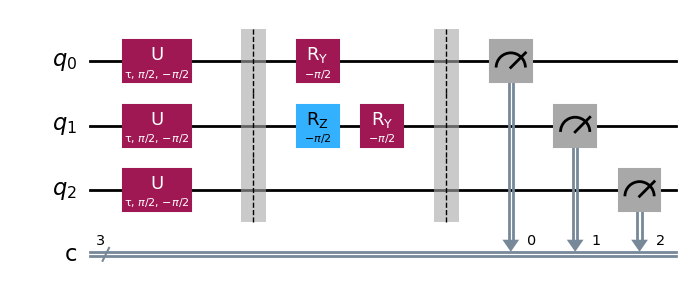

In [4]:
tau = Parameter('τ')
qr = QuantumRegister(3,'q')
cr = ClassicalRegister(3,'c')

Nt = int(2*np.pi // (mu*B_0*del_t))

tau_range = np.linspace(0, 2*np.pi, Nt)

timecirc = QuantumCircuit(qr,cr)

#no initial unitary transformation since |ψ(0)> = |+>

timecirc.u(tau,np.pi/2,-np.pi/2,qr) #apply exp(-iHt/ħ)
timecirc.barrier(qr)
timecirc.ry(-np.pi/2,0) #rotation to measure <Sx>

timecirc.rz(-np.pi/2,1)
timecirc.ry(-np.pi/2,1) #rotation to measure <Sy>
timecirc.barrier(qr)
#no rotation needed to measure <Sz>

timecirc.measure(qr,cr)
display(timecirc.draw(output="mpl"))
transpiled_circ = transpile(timecirc, simulator)

In [5]:
# Running the circuit
Nshots = 8192
simcounts = []
for t in tau_range:
    transpiled_circ_with_param = transpiled_circ.assign_parameters({tau: t})

    result = simulator.run(transpiled_circ_with_param, shots=Nshots).result()

    simcounts.append(result.get_counts(transpiled_circ_with_param))

In [6]:
# Postprocessing
c000 = np.array(list(map(lambda c: c.get('000', 0), simcounts)))
c001 = np.array(list(map(lambda c: c.get('001', 0), simcounts)))
c010 = np.array(list(map(lambda c: c.get('010', 0), simcounts)))
c011 = np.array(list(map(lambda c: c.get('011', 0), simcounts)))
c100 = np.array(list(map(lambda c: c.get('100', 0), simcounts)))
c101 = np.array(list(map(lambda c: c.get('101', 0), simcounts)))
c110 = np.array(list(map(lambda c: c.get('110', 0), simcounts)))
c111 = np.array(list(map(lambda c: c.get('111', 0), simcounts)))

Sz = 0.5*(c000+c001+c010+c011-c100-c101-c110-c111)/Nshots
Sy = 0.5*(c000+c001+c100+c101-c010-c011-c110-c111)/Nshots
Sx = 0.5*(c000+c010+c100+c110-c001-c011-c101-c111)/Nshots

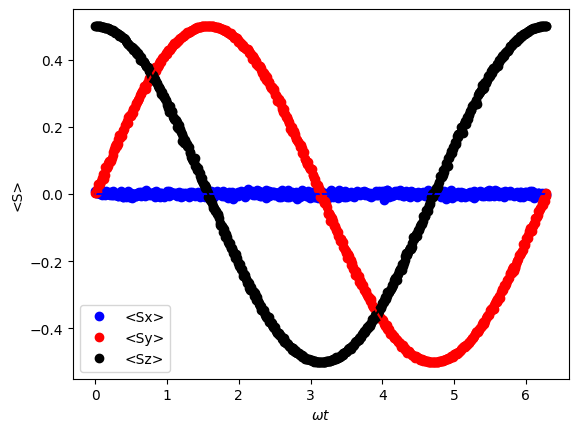

In [7]:
# Plotting
plt.plot(tau_range,Sx,'bo',label='<Sx>')
plt.plot(tau_range,Sy,'ro',label='<Sy>')
plt.plot(tau_range,Sz,'ko',label='<Sz>')
plt.plot(tau_range,0*np.zeros(Nt),'b-')
plt.plot(tau_range,0.5*np.sin(tau_range),'r-')
plt.plot(tau_range,0.5*np.cos(tau_range),'k-')
plt.xlabel('$\omega t$')
plt.ylabel('<S>')
plt.legend()
plt.show()

# 2 Spins system interacting each other

In [10]:
#two-gate operator for exp[i(α σx σx + β σy σy + γ σz σz)]
def N(α,β,γ,circ,q1,q2):
    circ.rz(-0.5*np.pi,q2)
    circ.cx(q2,q1)
    circ.rz(0.5*np.pi-2*γ,q1)
    circ.ry(2.0*α-0.5*np.pi,q2)
    circ.cx(q1,q2)
    circ.ry(0.5*np.pi-2.0*β,q2)
    circ.cx(q2,q1)
    circ.rz(0.5*np.pi,q1)

In [70]:
# Tunable Parameters
# Time interval (del_t)
del_t = 0.1

# Interaction strengths
Jx = 0.5
Jy = -0.45
Jz = 0.25

# Initial state
# Provide the Euler angles (in radian) wrt |0> state
# First spin
theta_1 = np.pi/6
phi_1 = np.pi/2
lambda_1 = 0
# Second spin
theta_2 = 0
phi_2 = np.pi/4
lambda_2 = np.pi/2

Circuit to measure Sz


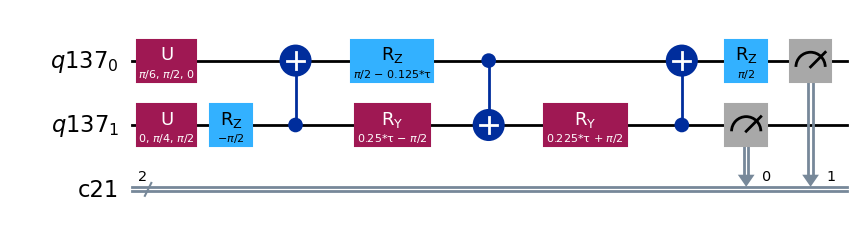

Circuit to measure Sx


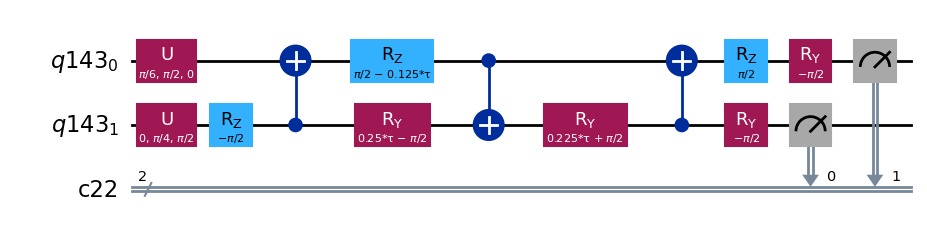

Circuit to measure Sy


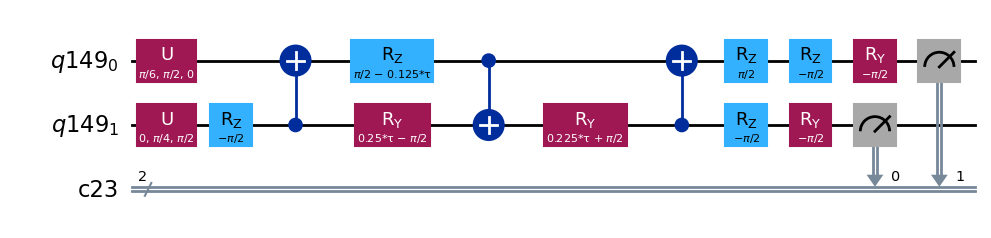

In [71]:
################################
# circuit to measure <Sz> ######
################################

Nt = int(10//del_t)

tau = Parameter('τ')
tau_range = np.linspace(0,10,Nt)

qr = QuantumRegister(2)
cr = ClassicalRegister(2)

timecirc = QuantumCircuit(qr,cr)

#initial states
timecirc.u(theta_1,phi_1,lambda_1,0)
timecirc.u(theta_2,phi_2,lambda_2,1)

N(Jx*tau/4.0,Jy*tau/4.0,Jz*tau/4.0,timecirc,0,1)

timecirc.measure(qr,[1,0])

print("Circuit to measure Sz")
display(timecirc.draw(output="mpl"))

transpiled_circ = transpile(timecirc, simulator)

Nshots = 8192
simcountsz = []
for t in tau_range:
    transpiled_circ_with_param = transpiled_circ.assign_parameters({tau: t})

    result = simulator.run(transpiled_circ_with_param, shots=Nshots).result()

    simcountsz.append(result.get_counts(transpiled_circ_with_param))

################################
# circuit to measure <Sx> ######
################################

qr = QuantumRegister(2)
cr = ClassicalRegister(2)

timecirc = QuantumCircuit(qr,cr)

#initial states
timecirc.u(theta_1,phi_1,lambda_1,0)
timecirc.u(theta_2,phi_2,lambda_2,1)

N(Jx*tau/4.0,Jy*tau/4.0,Jz*tau/4.0,timecirc,0,1)

timecirc.ry(-np.pi/2,qr)
timecirc.measure(qr,[1,0])

print("Circuit to measure Sx")
display(timecirc.draw(output="mpl"))

transpiled_circ = transpile(timecirc, simulator)

Nshots = 8192

simcountsx = []
for t in tau_range:
    transpiled_circ_with_param = transpiled_circ.assign_parameters({tau: t})

    result = simulator.run(transpiled_circ_with_param, shots=Nshots).result()

    simcountsx.append(result.get_counts(transpiled_circ_with_param))


################################
# circuit to measure <Sy> ######
################################

qr = QuantumRegister(2)
cr = ClassicalRegister(2)

timecirc = QuantumCircuit(qr,cr)

#initial states
timecirc.u(theta_1,phi_1,lambda_1,0)
timecirc.u(theta_2,phi_2,lambda_2,1)

N(Jx*tau/4.0,Jy*tau/4.0,Jz*tau/4.0,timecirc,0,1)

timecirc.rz(-np.pi/2,qr)
timecirc.ry(-np.pi/2,qr)
timecirc.measure(qr,[1,0])

print("Circuit to measure Sy")
display(timecirc.draw(output="mpl"))

transpiled_circ = transpile(timecirc, simulator)

Nshots = 8192

simcountsy = []
for t in tau_range:
    transpiled_circ_with_param = transpiled_circ.assign_parameters({tau: t})

    result = simulator.run(transpiled_circ_with_param, shots=Nshots).result()

    simcountsy.append(result.get_counts(transpiled_circ_with_param))

In [48]:
# Post processing
c00 = np.array(list(map(lambda c: c.get('00', 0), simcountsx)))
c01 = np.array(list(map(lambda c: c.get('01', 0), simcountsx)))
c10 = np.array(list(map(lambda c: c.get('10', 0), simcountsx)))
c11 = np.array(list(map(lambda c: c.get('11', 0), simcountsx)))

Sx1 = 0.5*(c00+c01-c10-c11)/Nshots
Sx2 = 0.5*(c00+c10-c01-c11)/Nshots

c00 = np.array(list(map(lambda c: c.get('00', 0), simcountsy)))
c01 = np.array(list(map(lambda c: c.get('01', 0), simcountsy)))
c10 = np.array(list(map(lambda c: c.get('10', 0), simcountsy)))
c11 = np.array(list(map(lambda c: c.get('11', 0), simcountsy)))

Sy1 = 0.5*(c00+c01-c10-c11)/Nshots
Sy2 = 0.5*(c00+c10-c01-c11)/Nshots

c00 = np.array(list(map(lambda c: c.get('00', 0), simcountsz)))
c01 = np.array(list(map(lambda c: c.get('01', 0), simcountsz)))
c10 = np.array(list(map(lambda c: c.get('10', 0), simcountsz)))
c11 = np.array(list(map(lambda c: c.get('11', 0), simcountsz)))

Sz1 = 0.5*(c00+c01-c10-c11)/Nshots
Sz2 = 0.5*(c00+c10-c01-c11)/Nshots

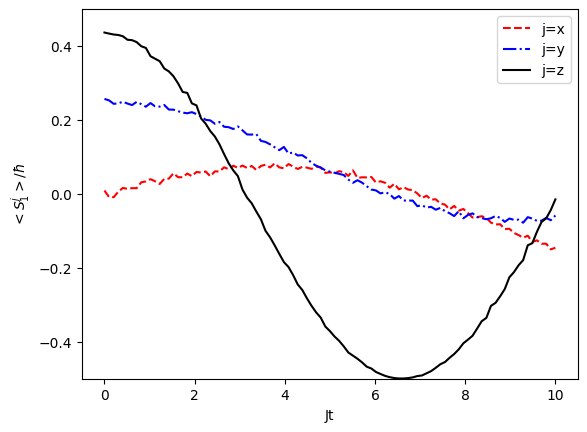

In [49]:
# Time evolution graph of the first spin
plt.plot(tau_range,Sx1,'r--')
plt.plot(tau_range,Sy1,'b-.')
plt.plot(tau_range,Sz1,'k-')
plt.xlabel('Jt')
plt.ylim(-0.5,0.5)
plt.ylabel('$<S_{1}^{j}>/\hbar$')
plt.legend(['j=x','j=y','j=z'])
plt.show()

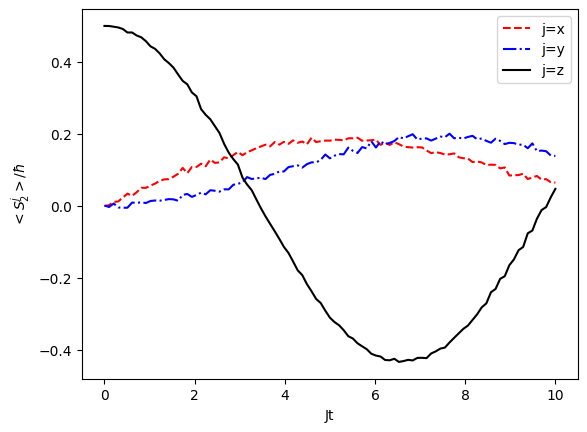

In [50]:
# Time evolution of the second spin
plt.plot(tau_range,Sx2,'r--')
plt.plot(tau_range,Sy2,'b-.')
plt.plot(tau_range,Sz2,'k-')
plt.xlabel('Jt')
plt.ylabel('$<S_{2}^{j}>/\hbar$')
plt.legend(['j=x','j=y','j=z'])
plt.show()

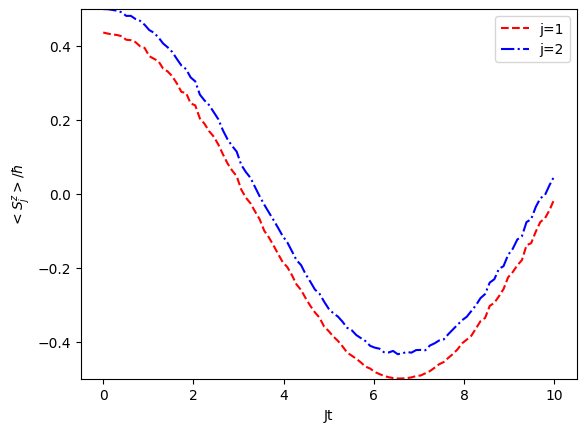

In [51]:
# Comparing Sz of the two spins
plt.plot(tau_range,Sz1,'r--')
plt.plot(tau_range,Sz2,'b-.')

plt.ylim(-0.5,0.5)
plt.xlabel('Jt')
plt.ylabel('$<S_{j}^{z}>/\hbar$')
plt.legend(['j=1','j=2'])
plt.show()

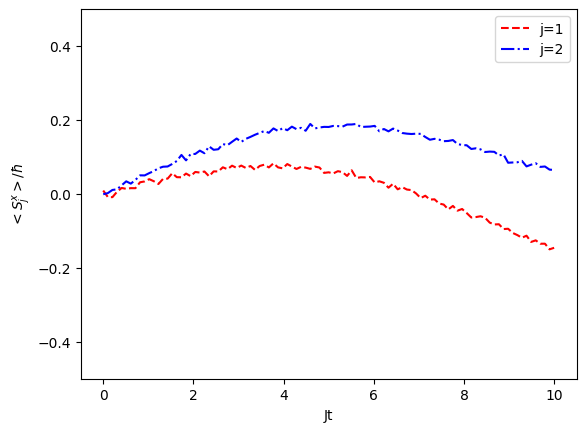

In [52]:
# Comparing Sx of the two spins
plt.plot(tau_range,Sx1,'r--')
plt.plot(tau_range,Sx2,'b-.')

plt.ylim(-0.5,0.5)
plt.xlabel('Jt')
plt.ylabel('$<S_{j}^{x}>/\hbar$')
plt.legend(['j=1','j=2'])
plt.show()

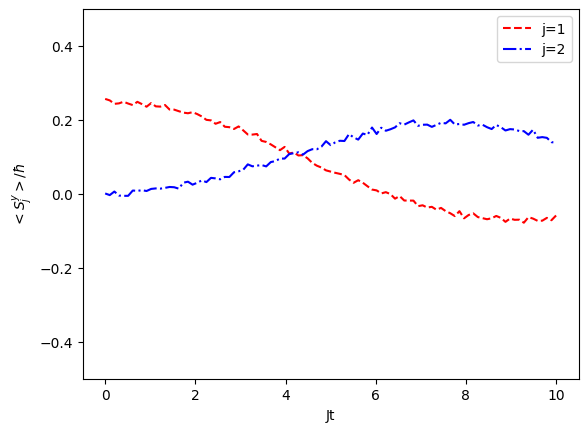

In [53]:
# Comparing Sy of the two spins
plt.plot(tau_range,Sy1,'r--')
plt.plot(tau_range,Sy2,'b-.')

plt.ylim(-0.5,0.5)
plt.xlabel('Jt')
plt.ylabel('$<S_{j}^{y}>/\hbar$')
plt.legend(['j=1','j=2'])
plt.show()

# 3 Spins System

In [72]:
# Tunable Parameters
# Tunable Parameters
# Time interval (del_t)
del_t = 0.1

# Interaction strengths
Jx = 0.5
Jy = -0.45
Jz = 0.25

# Initial state
# Provide the Euler angles (in radian) wrt |0> state
# First spin
theta_1 = np.pi/6
phi_1 = np.pi/2
lambda_1 = 0
# Second spin
theta_2 = 0
phi_2 = np.pi/4
lambda_2 = np.pi/2

# Third spin
theta_3 = 0
phi_3 = 0
lambda_3 = 0

# Number of trotter steps
ntrot = 100

In [ ]:
################################
# circuit to measure <Sz> ######
################################

Nt = int(10//del_t)

tau = Parameter('τ')
tau_range = np.linspace(0,10,Nt)

qr = QuantumRegister(3)
cr = ClassicalRegister(3)

timecirc = QuantumCircuit(qr,cr)

#initial states
timecirc.u(theta_1,phi_1,lambda_1,0)
timecirc.u(theta_2,phi_2,lambda_2,1)
timecirc.u(theta_3,phi_3,lambda_3,2)

for i in range(0,ntrot):
    N(Jx*(tau/ntrot)/4.0,Jy*(tau/ntrot)/4.0,Jz*(tau/ntrot)/4.0,timecirc,0,1)
    N(Jx*(tau/ntrot)/4.0,Jy*(tau/ntrot)/4.0,Jz*(tau/ntrot)/4.0,timecirc,1,2)

timecirc.measure(qr,cr)

# Circuit diagram is large due to Trotter steps. Print it only if necessary.
# print("Circuit to measure Sz")
# display(timecirc.draw(output="mpl"))

transpiled_circ = transpile(timecirc, simulator)

Nshots = 8192
simcountsz = []
for t in tau_range:
    transpiled_circ_with_param = transpiled_circ.assign_parameters({tau: t})

    result = simulator.run(transpiled_circ_with_param, shots=Nshots).result()

    simcountsz.append(result.get_counts(transpiled_circ_with_param))

################################
# circuit to measure <Sx> ######
################################

qr = QuantumRegister(3)
cr = ClassicalRegister(3)

timecirc = QuantumCircuit(qr,cr)

#initial states
timecirc.u(theta_1,phi_1,lambda_1,0)
timecirc.u(theta_2,phi_2,lambda_2,1)
timecirc.u(theta_3,phi_3,lambda_3,2)

for i in range(0,ntrot):
    N(Jx*(tau/ntrot)/4.0,Jy*(tau/ntrot)/4.0,Jz*(tau/ntrot)/4.0,timecirc,0,1)
    N(Jx*(tau/ntrot)/4.0,Jy*(tau/ntrot)/4.0,Jz*(tau/ntrot)/4.0,timecirc,1,2)

timecirc.ry(-np.pi/2,qr)

timecirc.measure(qr,cr)

# Circuit diagram is large due to Trotter steps. Print it only if necessary.
# print("Circuit to measure Sx")
# display(timecirc.draw(output="mpl"))

transpiled_circ = transpile(timecirc, simulator)

Nshots = 8192

simcountsx = []
for t in tau_range:
    transpiled_circ_with_param = transpiled_circ.assign_parameters({tau: t})

    result = simulator.run(transpiled_circ_with_param, shots=Nshots).result()

    simcountsx.append(result.get_counts(transpiled_circ_with_param))


################################
# circuit to measure <Sy> ######
################################

qr = QuantumRegister(3)
cr = ClassicalRegister(3)

timecirc = QuantumCircuit(qr,cr)

#initial states
timecirc.u(theta_1,phi_1,lambda_1,0)
timecirc.u(theta_2,phi_2,lambda_2,1)
timecirc.u(theta_3,phi_3,lambda_3,2)

for i in range(0,ntrot):
    N(Jx*(tau/ntrot)/4.0,Jy*(tau/ntrot)/4.0,Jz*(tau/ntrot)/4.0,timecirc,0,1)
    N(Jx*(tau/ntrot)/4.0,Jy*(tau/ntrot)/4.0,Jz*(tau/ntrot)/4.0,timecirc,1,2)

timecirc.rz(-np.pi/2,qr)
timecirc.ry(-np.pi/2,qr)
timecirc.measure(qr,cr)

# Circuit diagram is large due to Trotter steps. Print it only if necessary.
# print("Circuit to measure Sy")
# display(timecirc.draw(output="mpl"))

transpiled_circ = transpile(timecirc, simulator)

Nshots = 8192

simcountsy = []
for t in tau_range:
    transpiled_circ_with_param = transpiled_circ.assign_parameters({tau: t})

    result = simulator.run(transpiled_circ_with_param, shots=Nshots).result()

    simcountsy.append(result.get_counts(transpiled_circ_with_param))

In [74]:
# Post processing
#array to store time-dependent expectation values of Sz for all three spins

Szt = np.zeros((3,Nt))

for i in range(0,Nt):
    counts = simcountsz[i]
    keylist = list(counts.keys())
    for j in range(0,len(keylist)):
        state = keylist[j]

        if (state[0]=='0'):
            Szt[0,i] = Szt[0,i] + counts[state]
        else:
            Szt[0,i] = Szt[0,i] - counts[state]


        if (state[1]=='0'):
            Szt[1,i] = Szt[1,i] + counts[state]
        else:
            Szt[1,i] = Szt[1,i] - counts[state]


        if (state[2]=='0'):
            Szt[2,i] = Szt[2,i] + counts[state]
        else:
            Szt[2,i] = Szt[2,i] - counts[state]

Szt = 0.5*Szt/Nshots

In [75]:
#array to store time-dependent expectation values of Sx for all three spins

Sxt = np.zeros((3,Nt))

for i in range(0,Nt):
    counts = simcountsx[i]
    keylist = list(counts.keys())
    for j in range(0,len(keylist)):
        state = keylist[j]

        if (state[0]=='0'):
            Sxt[0,i] = Sxt[0,i] + counts[state]
        else:
            Sxt[0,i] = Sxt[0,i] - counts[state]


        if (state[1]=='0'):
            Sxt[1,i] = Sxt[1,i] + counts[state]
        else:
            Sxt[1,i] = Sxt[1,i] - counts[state]


        if (state[2]=='0'):
            Sxt[2,i] = Sxt[2,i] + counts[state]
        else:
            Sxt[2,i] = Sxt[2,i] - counts[state]

Sxt = 0.5*Sxt/Nshots

In [76]:
#array to store time-dependent expectation values of Sy for all three spins

Syt = np.zeros((3,Nt))

for i in range(0,Nt):
    counts = simcountsy[i]
    keylist = list(counts.keys())
    for j in range(0,len(keylist)):
        state = keylist[j]

        if (state[0]=='0'):
            Syt[0,i] = Syt[0,i] + counts[state]
        else:
            Syt[0,i] = Syt[0,i] - counts[state]


        if (state[1]=='0'):
            Syt[1,i] = Syt[1,i] + counts[state]
        else:
            Syt[1,i] = Syt[1,i] - counts[state]


        if (state[2]=='0'):
            Syt[2,i] = Syt[2,i] + counts[state]
        else:
            Syt[2,i] = Syt[2,i] - counts[state]

Syt = 0.5*Syt/Nshots

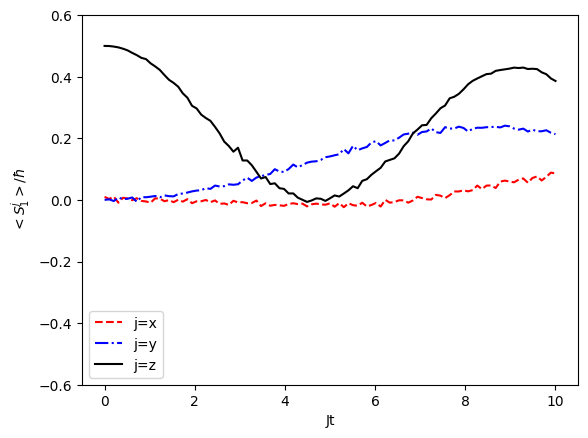

In [77]:
# Time evolution graph of the first spin
plt.plot(tau_range,Sxt[0,:],'r--')
plt.plot(tau_range,Syt[0,:],'b-.')
plt.plot(tau_range,Szt[0,:],'k-')
plt.xlabel('Jt')
plt.ylim(-0.6,0.6)
plt.ylabel('$<S_{1}^{j}>/\hbar$')
plt.legend(['j=x','j=y','j=z'])
plt.show()

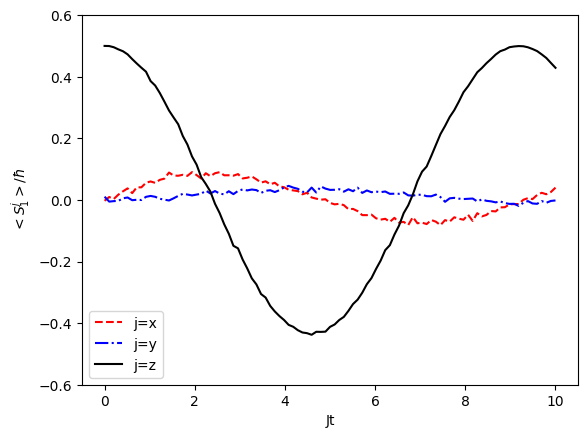

In [78]:
# Time evolution graph of the second spin
plt.plot(tau_range,Sxt[1,:],'r--')
plt.plot(tau_range,Syt[1,:],'b-.')
plt.plot(tau_range,Szt[1,:],'k-')
plt.xlabel('Jt')
plt.ylim(-0.6,0.6)
plt.ylabel('$<S_{1}^{j}>/\hbar$')
plt.legend(['j=x','j=y','j=z'])
plt.show()

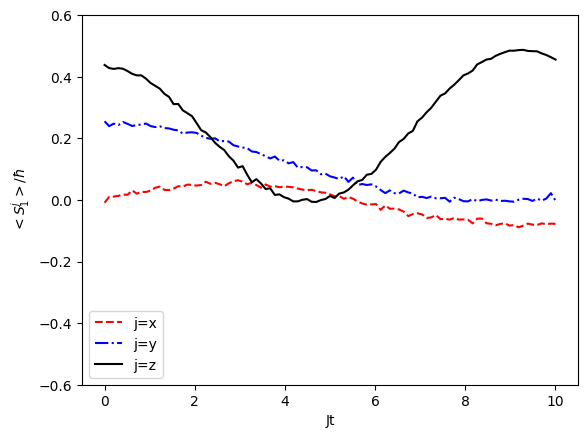

In [79]:
# Time evolution graph of the third spin
plt.plot(tau_range,Sxt[2,:],'r--')
plt.plot(tau_range,Syt[2,:],'b-.')
plt.plot(tau_range,Szt[2,:],'k-')
plt.xlabel('Jt')
plt.ylim(-0.6,0.6)
plt.ylabel('$<S_{1}^{j}>/\hbar$')
plt.legend(['j=x','j=y','j=z'])
plt.show()

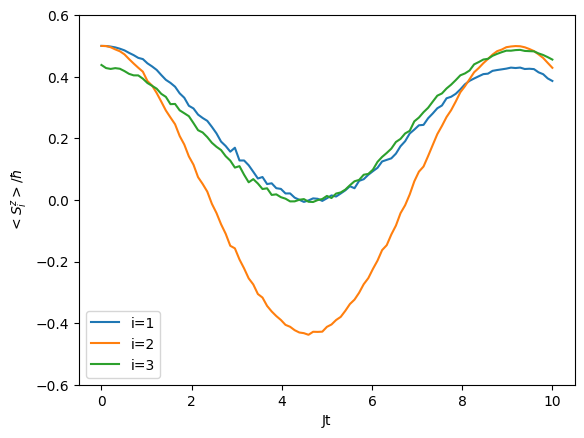

In [80]:
# Compare Sz of the three spins
plt.plot(tau_range,Szt[0,:])
plt.plot(tau_range,Szt[1,:])
plt.plot(tau_range,Szt[2,:])
plt.xlabel('Jt')
plt.ylim(-0.6,0.6)
plt.ylabel('$<S_{i}^{z}>/\hbar$')
plt.legend(['i=1','i=2','i=3'])
plt.show()

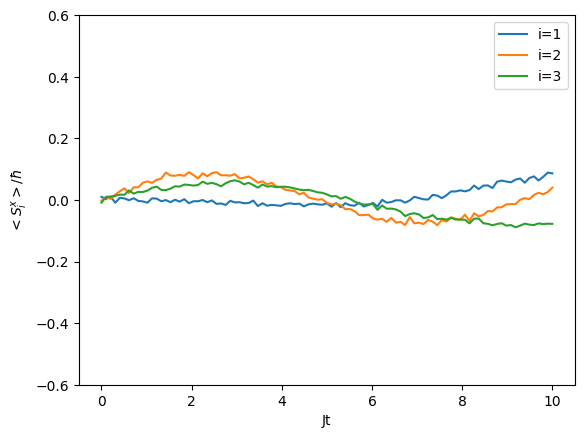

In [81]:
# Compare Sx of the three spins
plt.plot(tau_range,Sxt[0,:])
plt.plot(tau_range,Sxt[1,:])
plt.plot(tau_range,Sxt[2,:])
plt.xlabel('Jt')
plt.ylim(-0.6,0.6)
plt.ylabel('$<S_{i}^{x}>/\hbar$')
plt.legend(['i=1','i=2','i=3'])
plt.show()

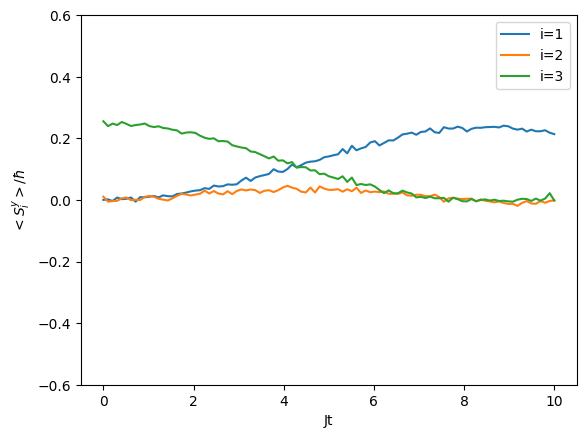

In [82]:
# Compare Sy of the three spins
plt.plot(tau_range,Syt[0,:])
plt.plot(tau_range,Syt[1,:])
plt.plot(tau_range,Syt[2,:])
plt.xlabel('Jt')
plt.ylim(-0.6,0.6)
plt.ylabel('$<S_{i}^{y}>/\hbar$')
plt.legend(['i=1','i=2','i=3'])
plt.show()